<a href="https://colab.research.google.com/github/seymaerdogan0/machine-learning-starter-project/blob/main/dengesiz_kart_verileri_%C3%BCzerine_en_verimli_makine_%C3%B6%C4%9Frenmesi_algoritmas%C4%B1n%C4%B1_bulma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Eğer /root/.kaggle klasörü yoksa oluştur
os.makedirs("/root/.kaggle", exist_ok=True)


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eymaerdoan","key":"3569e5853849ea68cb554be218e05f7a"}'}

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile("creditcardfraud.zip", "r") as zip_ref:
    zip_ref.extractall("creditcardfraud")

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

df = pd.read_csv("creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:

df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


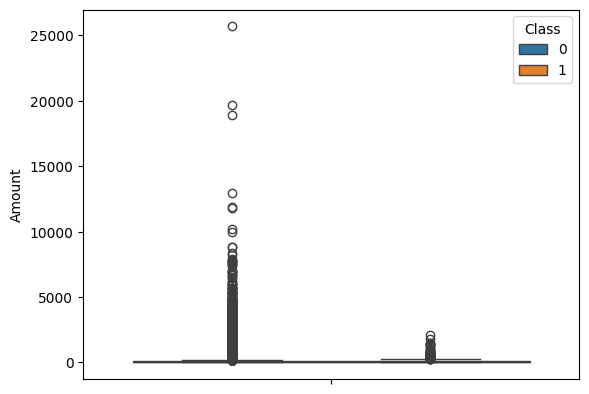

In [ ]:
sns.boxplot(y="Amount",hue="Class",data=df)
plt.show()

Amount değişkeninde çok fazla outlier var . dolandırıcılık sınıfında çok yüksek outlier değerleri olmadığı için çok fazla veri kaybı olmaması açısından dolandırıcılık classında olmayan kadar outlierı silebiliriz

In [ ]:
# Amount değeri dolandırıcılık verisinin üstünde olan veriler siliniyor
df = df.drop(df[df["Amount"] > 3000].index, axis=0).reset_index(drop=True)

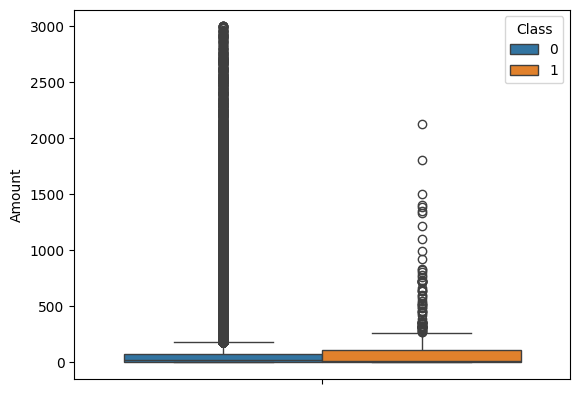

In [ ]:
sns.boxplot(y="Amount",hue="Class",data=df)
plt.show()

hala normal verilerde outlier daha fazla. biraz daha silelim

In [ ]:
df = df.drop(df[df["Amount"] > 750].index, axis=0).reset_index(drop=True)

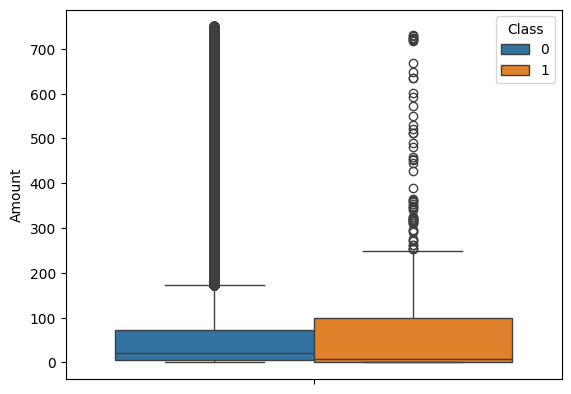

In [ ]:
sns.boxplot(y="Amount",hue="Class",data=df)
plt.show()

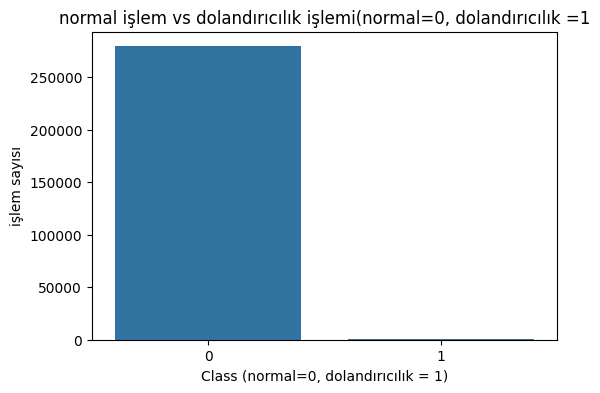

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title("normal işlem vs dolandırıcılık işlemi(normal=0, dolandırıcılık =1")
plt.xlabel('Class (normal=0, dolandırıcılık = 1)')
plt.ylabel('işlem sayısı')
plt.show()

dolandırıcılık verileri normal verilerden aşır az. bu dengesizliği eğitimden önce çözeceğiz

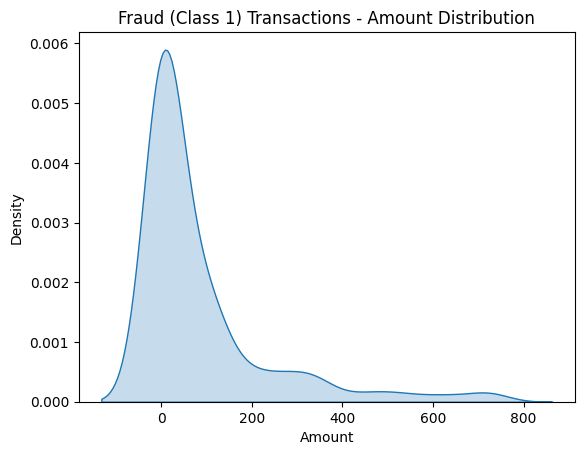

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class değeri 1 olan (fraud) işlemleri filtreleme
df_fraud = df[df["Class"] == 1]

# Amount değişkeninin KDE dağılım grafiği
sns.kdeplot(data=df_fraud, x="Amount", fill=True)
plt.title("Fraud (Class 1) Transactions - Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.show()


belli tutarlarda dolandırıcılık işlemi sayısı fazla

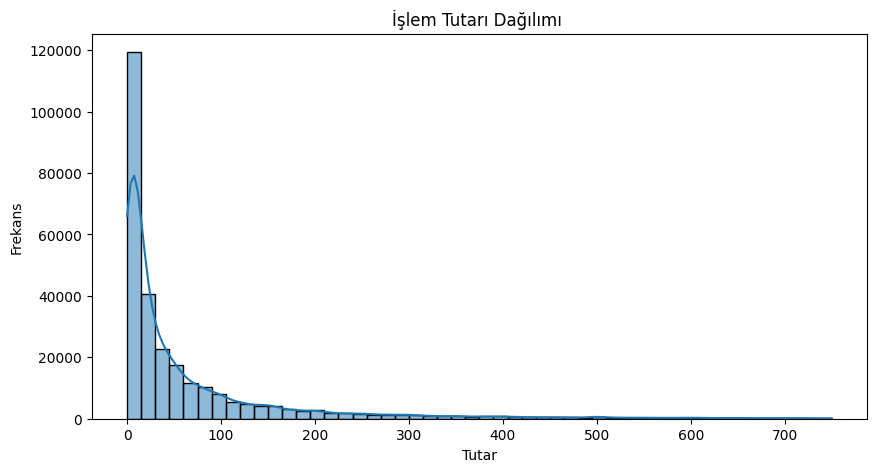

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("İşlem Tutarı Dağılımı ")
plt.xlabel("Tutar")
plt.ylabel("Frekans")
plt.show()


ama genel olarak o tutarlarda işlem daha fazla

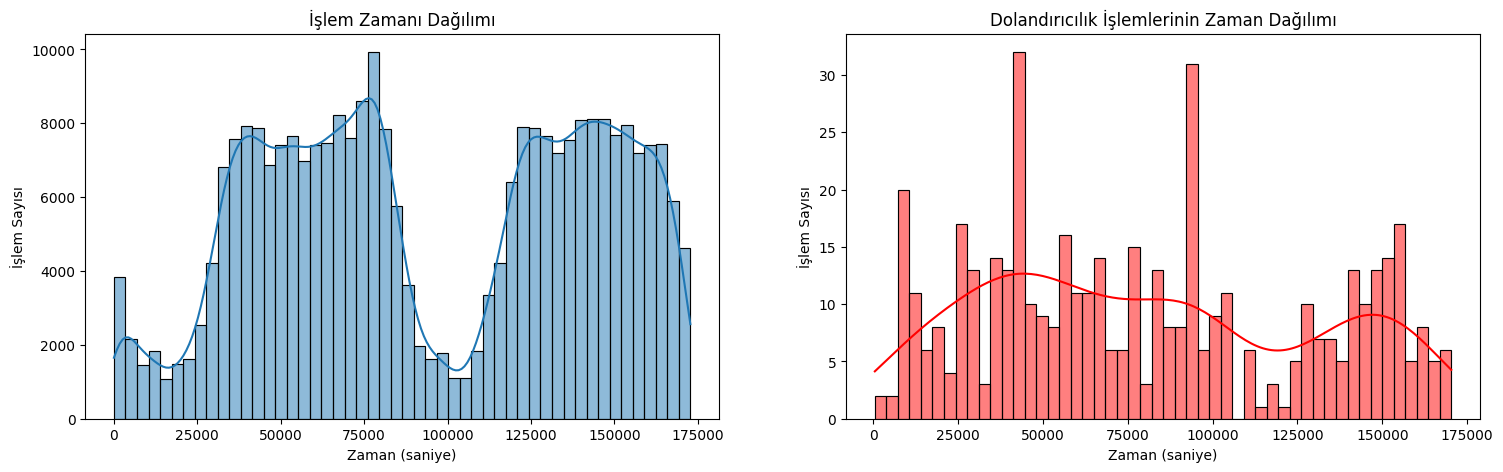

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,5))

sns.histplot(df['Time'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("İşlem Zamanı Dağılımı")
axes[0].set_xlabel("Zaman (saniye)")
axes[0].set_ylabel("İşlem Sayısı")

sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red', ax=axes[1])
axes[1].set_title("Dolandırıcılık İşlemlerinin Zaman Dağılımı")
axes[1].set_xlabel("Zaman (saniye)")
axes[1].set_ylabel("İşlem Sayısı")

plt.show()

<Axes: >

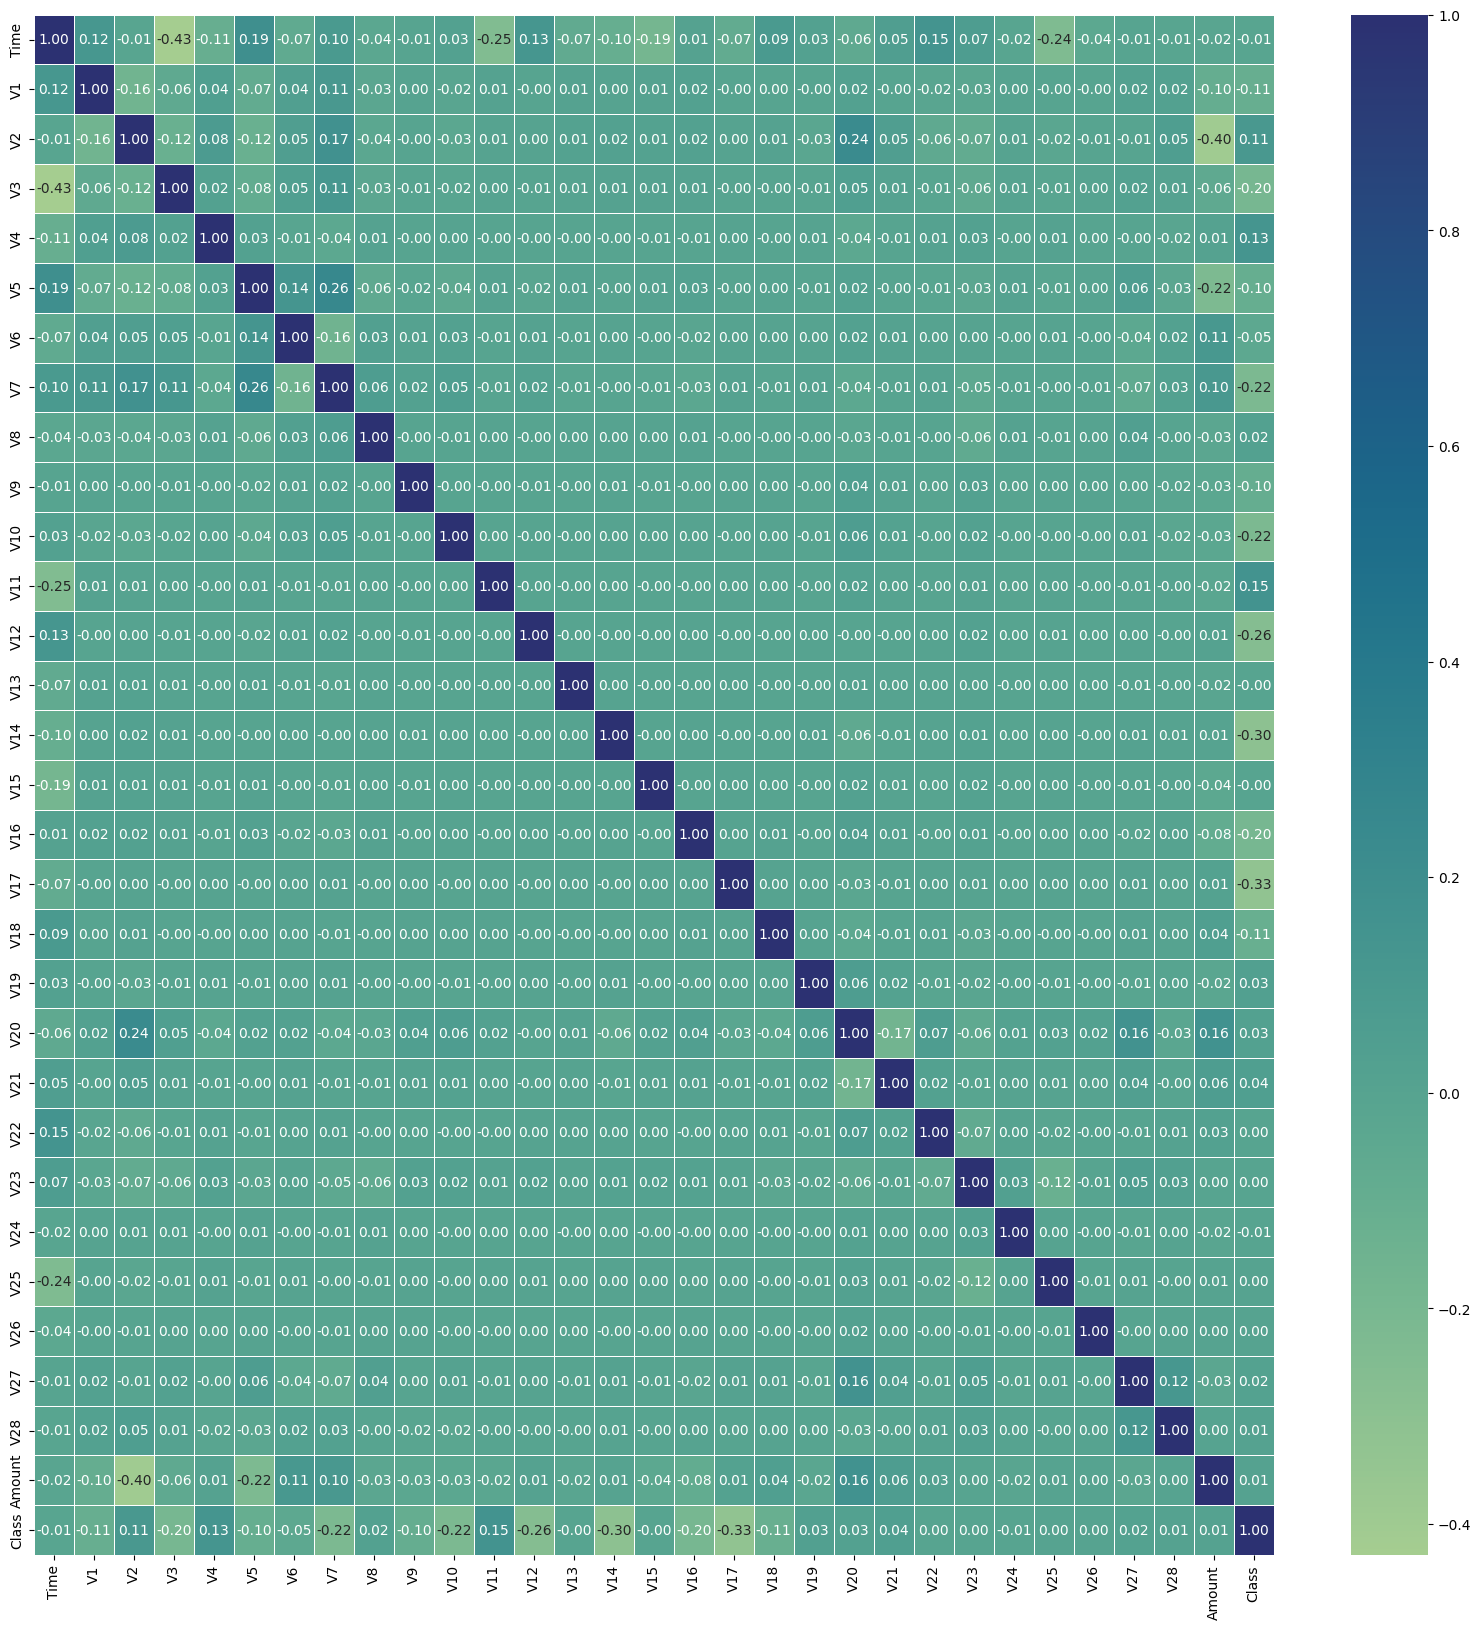

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),fmt=".2f",annot=True,linewidths=0.5,cmap="crest")

şimdi bu şekilde ilişkiler ve hangi özelliklerin daha önemli olduğu çok anlaşılmıyor. bunun için verimizin özellik önemlerini inceleyelim ve verimizi test ve train olarak bölelim ki model eğitiminde düzgünce kullanabilelim.

Veri setindeki Amount ve Time gibi değişkenlerin ölçekleri farklı olduğu için, StandardScaler ile tüm değişkenler aynı ölçeğe getirmeliyiz. class 1 ve class 0 arasındaki dengesizliği çözmek için de undersampling metodunu kullanabiliriz(aslında SMOTE , oversampling, class weight gibi metodlar da var fakat verimiz çok fazla olduğu için sentetik veri üretince çok gpu tüketiyor, işlem süresi uzuyor, ben colabin ücretsiz gpu hakkını kullanıyorum o da hızlı tükeniyor. bu nedenle undersampling metodunu tercih ettim.)  Bu şekilde, modelin sadece çoğunluk sınıfına yönelmesini engelleyerek daha adil tahminler yapmasını sağlıyoruz.



    Verimizi test ve train olarak özellik önem analizi grafiğini çizerken bölmüştük
    cross validation için ise farklı bir metod kullanacağım bu nedenle onun için ayrı bir veri bölmedim

In [ ]:
df['Class'].value_counts()

,count
Class,
0,279356
1,476


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

d_c0 = df[df["Class"] == 0]

d_c1 = df[df["Class"] == 1]

d_c0 = d_c0.sample(n=476, random_state=42)

df_sampled = pd.concat([d_c0, d_c1], axis=0)

def normalize_features(df_sampled, features):
    df_normalized = df_sampled.copy()
    for var in features:
        mean_val = np.mean(df_sampled[var])
        max_val = np.max(df_sampled[var])
        min_val = np.min(df_sampled[var])
        df_normalized[var] = (df_sampled[var] - mean_val) / (max_val - min_val)

    return df_normalized

# Normalize edilecek özellikleri belirle (Class hariç)
features = df_sampled.columns.tolist()
features.remove("Class")

# Normalizasyon işlemi
df_normalized = normalize_features(df_sampled, features)

# Class sütununu geri ekleyelim
df_normalized["Class"] = df_sampled["Class"]

X = df_normalized.drop(['Class'], axis=1)
Y = df_normalized['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)

X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train size: {len(X_train)}, Validation size: {len(X_cv)}, Test size: {len(X_test)}")
print("\nSınıf Dağılımı:")
print("Eğitim Seti:")
print(pd.Series(y_train).value_counts())
print("\nDoğrulama Seti:")
print(pd.Series(y_cv).value_counts())
print("\nTest Seti:")
print(pd.Series(y_test).value_counts())


Train size: 571, Validation size: 190, Test size: 191

Sınıf Dağılımı:
Eğitim Seti:
Class
1    286
0    285
Name: count, dtype: int64

Doğrulama Seti:
Class
1    95
0    95
Name: count, dtype: int64

Test Seti:
Class
0    96
1    95
Name: count, dtype: int64


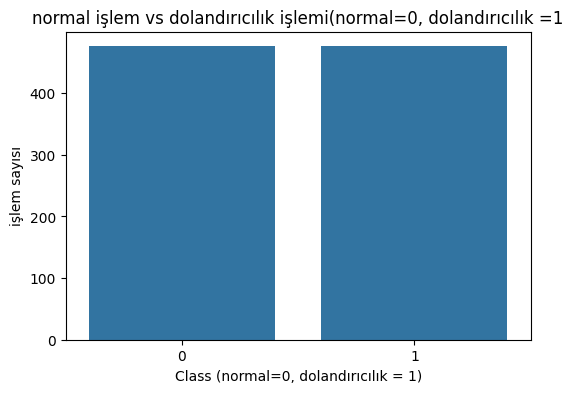

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=dataN)
plt.title("normal işlem vs dolandırıcılık işlemi(normal=0, dolandırıcılık =1")
plt.xlabel('Class (normal=0, dolandırıcılık = 1)')
plt.ylabel('işlem sayısı')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models_undersample = {
    "RF_UnderSampling": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    ),
    "RF_MoreTrees_UnderSampling": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    ),
    "XGBoost_UnderSampling": XGBClassifier(
        n_estimators=100,
        max_depth=6,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=len(y_train) / sum(y_train)
    )
}

results = {}

for model_name, model in models_undersample.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_cv)

    accuracy = accuracy_score(y_cv, y_pred)
    precision = precision_score(y_cv, y_pred)
    recall = recall_score(y_cv, y_pred)
    f1 = f1_score(y_cv, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# **Sonuçları Yazdır**
print("\n=== Model Performans Sonuçları ===")
for model, metrics in results.items():
    print(f"\n📌 {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



=== Model Performans Sonuçları ===

📌 RF_UnderSampling
Accuracy: 0.9526
Precision: 0.9778
Recall: 0.9263
F1 Score: 0.9514

📌 RF_MoreTrees_UnderSampling
Accuracy: 0.9526
Precision: 0.9778
Recall: 0.9263
F1 Score: 0.9514

📌 XGBoost_UnderSampling
Accuracy: 0.9526
Precision: 0.9574
Recall: 0.9474
F1 Score: 0.9524


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:09:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

nn_model_use = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_use.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = nn_model_use.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_cv, y_cv),
    callbacks=[early_stopping],
    verbose=1
)

y_pred_prob = nn_model_use.predict(X_cv)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_cv, y_pred)
precision = precision_score(y_cv, y_pred)
recall = recall_score(y_cv, y_pred)
f1 = f1_score(y_cv, y_pred)

print("\n Yapay Sinir Ağı Modeli Performansı")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6558 - loss: 0.6641 - val_accuracy: 0.8632 - val_loss: 0.5927
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8457 - loss: 0.5719 - val_accuracy: 0.8947 - val_loss: 0.4888
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8852 - loss: 0.4535 - val_accuracy: 0.9053 - val_loss: 0.3858
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8809 - loss: 0.3735 - val_accuracy: 0.9105 - val_loss: 0.3072
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9149 - loss: 0.2827 - val_accuracy: 0.9105 - val_loss: 0.2539
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9242 - loss: 0.2345 - val_accuracy: 0.9158 - val_loss: 0.2178
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9216 - loss: 0.2137 - val_accuracy: 0.9263 - val_loss: 0.1938
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9417 - loss: 0.1766 - val_accuracy: 0.9421 - val_loss: 0.1759
Ep

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

 Yapay Sinir Ağı Modeli Performansı
Accuracy: 0.9579
Precision: 0.9677
Recall: 0.9474
F1 Score: 0.9574


### farklı nöron sayılarıyla Deneme

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Dropout, BatchNormalization

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Verileri normalleştirir
    Dropout(0.3),  # Overfitting'i azaltır
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


nn_model_use.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history2 = nn_model_use.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_cv, y_cv),
    callbacks=[early_stopping],
    verbose=1
)

y_pred_prob = nn_model_use.predict(X_cv)
y_pred2 = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_cv, y_pred2)
precision = precision_score(y_cv, y_pred2)
recall = recall_score(y_cv, y_pred2)
f1 = f1_score(y_cv, y_pred2)

print("\n Yapay Sinir Ağı Modeli Performansı")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9590 - loss: 0.1009 - val_accuracy: 0.9579 - val_loss: 0.1370
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9670 - loss: 0.0852 - val_accuracy: 0.9632 - val_loss: 0.1369
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9576 - loss: 0.0913 - val_accuracy: 0.9632 - val_loss: 0.1374
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9626 - loss: 0.0898 - val_accuracy: 0.9632 - val_loss: 0.1406
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9602 - loss: 0.0907 - val_accuracy: 0.9632 - val_loss: 0.1407
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Yapay Sinir Ağı Modeli Performansı
Accuracy: 0.9632
Precision: 0.9783
Recall: 0.9474
F1 Score: 0.9626


çok az bir fark oldu

## **daha küçük batchsize ile deneme (verimiz çok büyük değil tek seferde daha az örnek daha iyi öğrenmesini sağlayabilir)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

nn_model_use = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_use.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history3 = nn_model_use.fit(
    X_train, y_train,
    epochs=25,
    batch_size=8,
    validation_data=(X_cv, y_cv),
    callbacks=[early_stopping],
    verbose=1
)

y_pred_prob = nn_model_use.predict(X_cv)
y_pred3 = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_cv, y_pred3)
precision = precision_score(y_cv, y_pred3)
recall = recall_score(y_cv, y_pred3)
f1 = f1_score(y_cv, y_pred3)

print("\n Yapay Sinir Ağı Modeli Performansı")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7683 - loss: 0.6284 - val_accuracy: 0.9053 - val_loss: 0.3856
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8928 - loss: 0.3281 - val_accuracy: 0.9263 - val_loss: 0.2074
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9455 - loss: 0.1861 - val_accuracy: 0.9526 - val_loss: 0.1608
Epoch 4/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9577 - loss: 0.1260 - val_accuracy: 0.9579 - val_loss: 0.1485
Epoch 5/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9507 - loss: 0.1417 - val_accuracy: 0.9474 - val_loss: 0.1451
Epoch 6/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9404 - loss: 0.1469 - val_accuracy: 0.9579 - val_loss: 0.1403
Epoch 7/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9582 - loss: 0.1077 - val_accuracy: 0.9579 - val_loss: 0.1322
Epoch 8/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.1140 - val_accuracy: 0.9579 - val_loss: 0.1338
Ep

bir tık daha iyi

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


xg boosta benzeyen bir model deneyelim

In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.05,
    random_state=42,
    scale_pos_weight=len(y_train) / sum(y_train),
    verbose=0
)

catboost_model.fit(X_train, y_train)

y_pred_catboost = catboost_model.predict(X_val)

print("\n📊 CatBoost Modeli Performans Raporu:")
print(classification_report(y_val, y_pred_catboost))
print("F1-Score:", f1_score(y_val, y_pred_catboost))



📊 CatBoost Modeli Performans Raporu:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        95
           1       0.97      0.94      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

F1-Score: 0.9518716577540107


bu model de küçük verilerle daha iyi çalışıyormuş

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_val)

print("\n📊 SVM Modeli Performans Raporu:")
print(classification_report(y_val, y_pred_svm))
print("F1-Score:", f1_score(y_val, y_pred_svm))



📊 SVM Modeli Performans Raporu:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        95
           1       0.99      0.91      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

F1-Score: 0.945054945054945


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(
    class_weight='balanced',
    max_iter=500,
    random_state=42
)

log_reg_model.fit(X_train, y_train)

y_pred_logreg = log_reg_model.predict(X_val)

print("\n📊 Logistic Regression Modeli Performans Raporu:")
print(classification_report(y_val, y_pred_logreg))
print("F1-Score:", f1_score(y_val, y_pred_logreg))



📊 Logistic Regression Modeli Performans Raporu:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        95
           1       1.00      0.87      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

F1-Score: 0.9325842696629213


**bu çok temel bir model çok iyi sonuç vermesini beklemiyordum zaten**

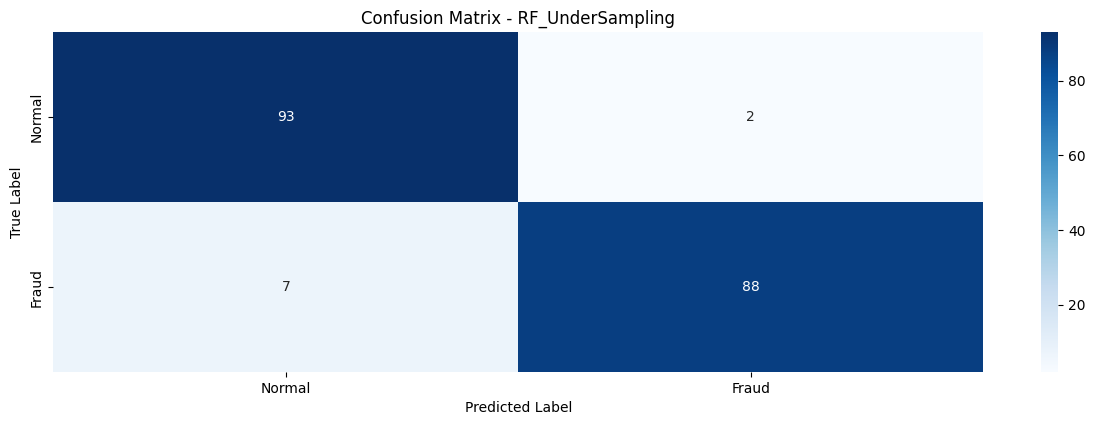

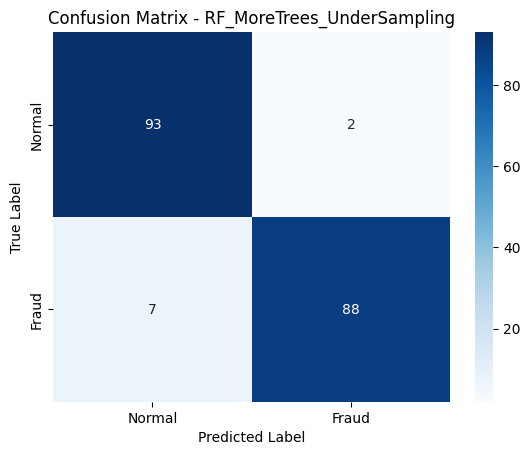

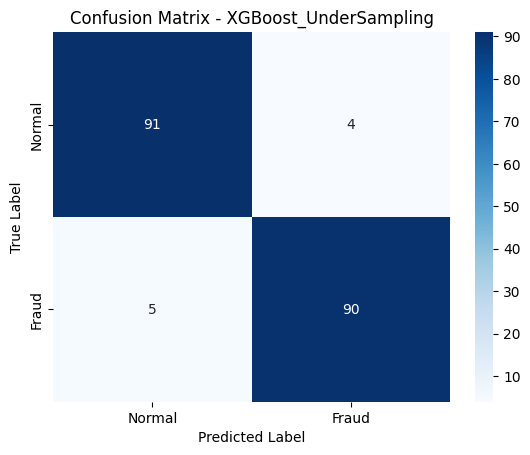

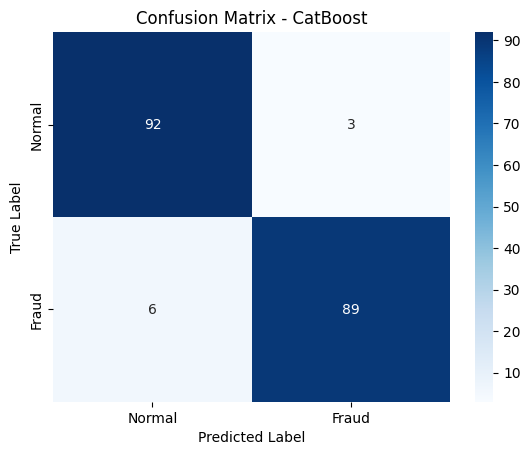

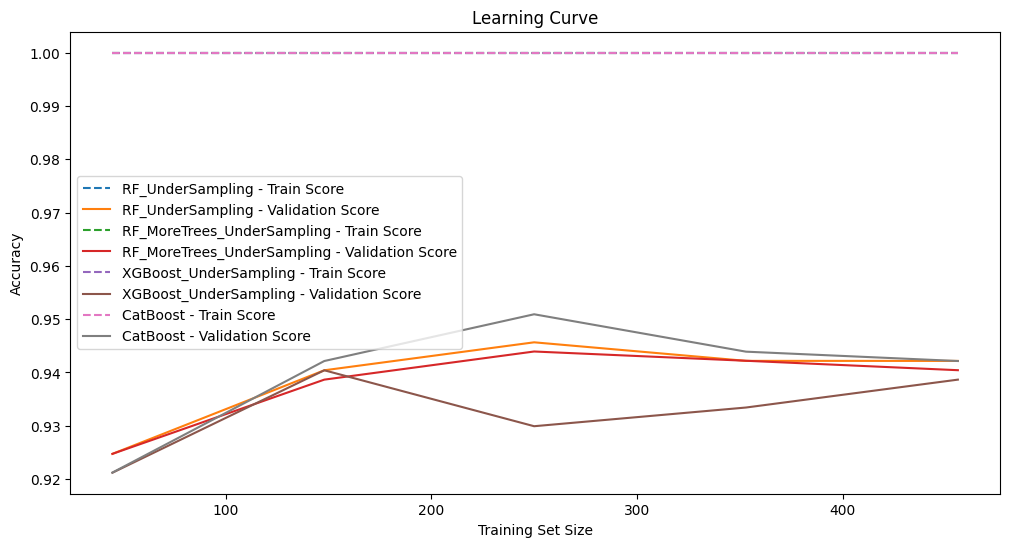

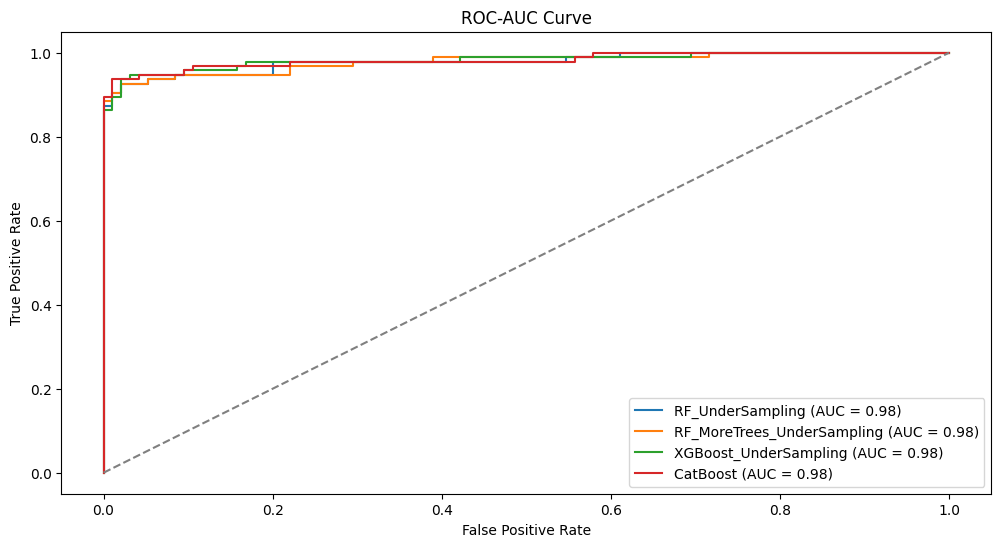

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve


models = {
    "RF_UnderSampling": models_undersample["RF_UnderSampling"],
    "RF_MoreTrees_UnderSampling": models_undersample["RF_MoreTrees_UnderSampling"],
    "XGBoost_UnderSampling": models_undersample["XGBoost_UnderSampling"],
    "CatBoost": catboost_model
}

X_test_set = X_val
y_test_set = y_val

plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.title("Confusion Matrix")
for name, model in models.items():
    y_pred = model.predict(X_test_set)
    cm = confusion_matrix(y_test_set, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

plt.figure(figsize=(12, 6))
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label=f"{name} - Train Score", linestyle="--")
    plt.plot(train_sizes, test_mean, label=f"{name} - Validation Score")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_set)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_set)
    fpr, tpr, _ = roc_curve(y_test_set, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


# CONFUSİON MATRİX

**RandomForest modelleri genel olarak iyi performans gösteriyor ancak 7 fraud vakasını kaçırıyor.
Daha fazla derinlik veya daha fazla ağaç kullanmak, modelin performansını çok fazla değiştirmemiş.**

**XGBoost modeli, fraud tespitinde daha başarılı görünüyor (90 doğru tahmin).
CatBoost modeli, yanlış alarmları (False Positive) en aza indirerek dengeli bir performans sunuyor.
Eğer odak fraud vakalarını yakalamaksa, XGBoost daha iyi bir seçim olabilir.
Eğer yanlış alarmlar önemliyse (örneğin müşteri memnuniyeti açısından), CatBoost tercih edilebilir.**



# LEARNİNG CURVE
## Analiz:

**CatBoost modeli aşırı yüksek bir eğitim doğruluğuna sahip, validation doğruluğu ise düşük.
→ Bu, aşırı öğrenme (overfitting) belirtisi olabilir.
Diğer modeller (RF, XGBoost) daha istikrarlı bir şekilde öğreniyor.
→ Eğitim seti arttıkça doğruluk artıyor, ancak aşırı bir fark yok.
Validation doğruluğu bir noktadan sonra düşmeye başlıyor.
→ Bu, modelin aşırı öğrenmeye başladığını ve daha fazla veriye ihtiyacı olabileceğini gösterir.**

## Çıkarım:

**CatBoost modeli fazla ezberliyor (overfitting).
Diğer modeller dengeli öğreniyor ancak validation doğrulukları sabitleniyor.
Eğer daha fazla veri eklenirse veya regularization artırılırsa, CatBoost'un overfitting'i azaltılabilir.**

# ROC-AUC CURVE

## Analiz
**ROC eğrileri birbirine çok benziyor.
→ Demek ki bu modellerin sahtecilik tespiti yetenekleri birbirine oldukça yakın.
Eğrilerin çoğu 0.0 - 0.2 False Positive bölgesinde dik bir çıkış yapıyor.
→ Bu, modellerin düşük yanlış alarm oranı (False Positive) ile yüksek tespit oranı (True Positive) sağladığını gösterir.**

## Çıkarım

**Tüm modeller sahtecilik tespitinde başarılı görünüyor.
AUC değerleri arasında fark olmadığı için modellerin diğer metrikleri (Recall, Precision) kıyaslanarak en iyi model seçilebilir.
Eğer ROC eğrisinde bir model daha düşük kalsaydı, onun daha zayıf olduğunu söyleyebilirdik.**

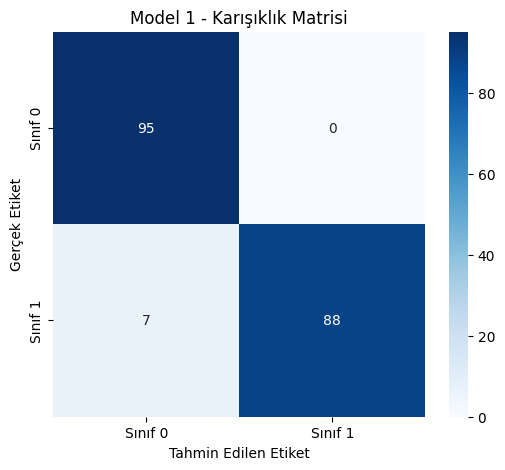

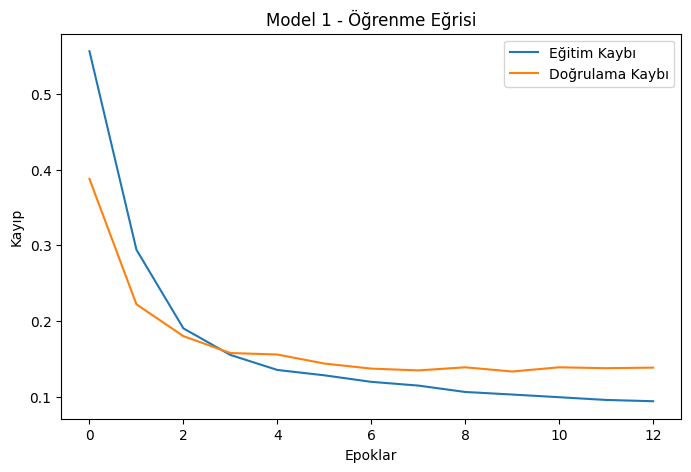

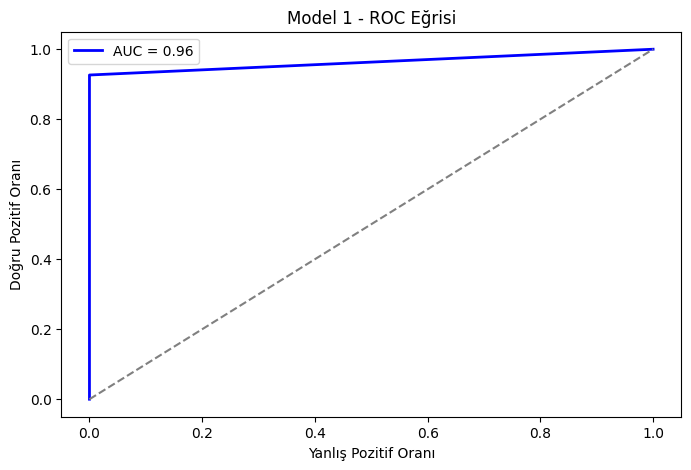

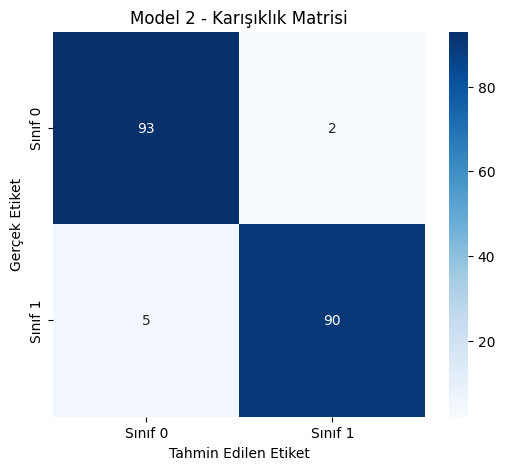

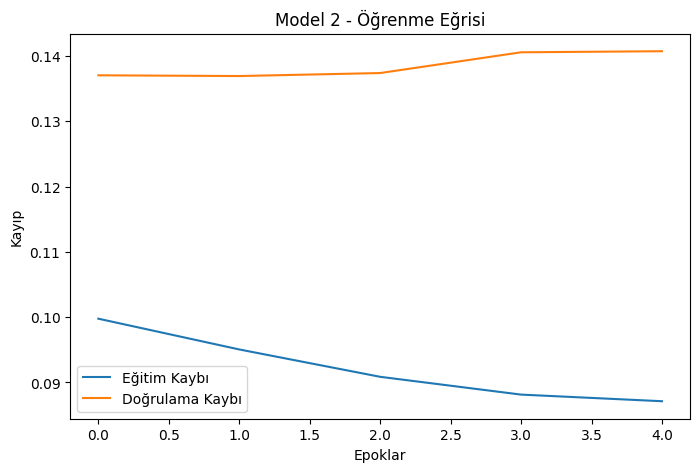

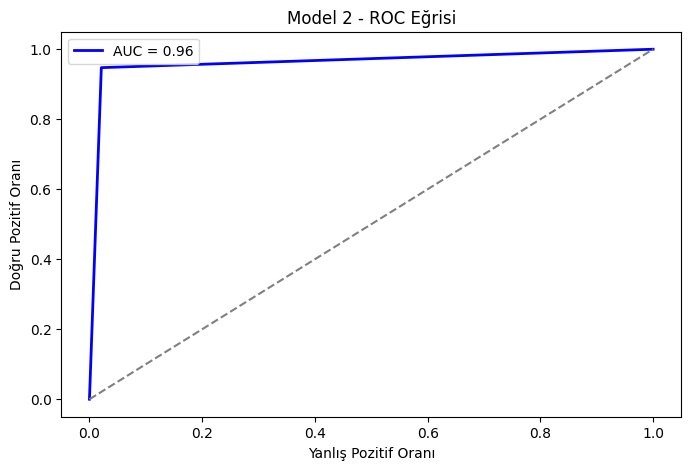

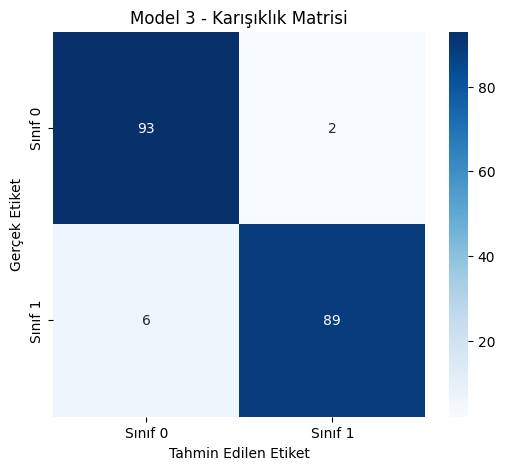

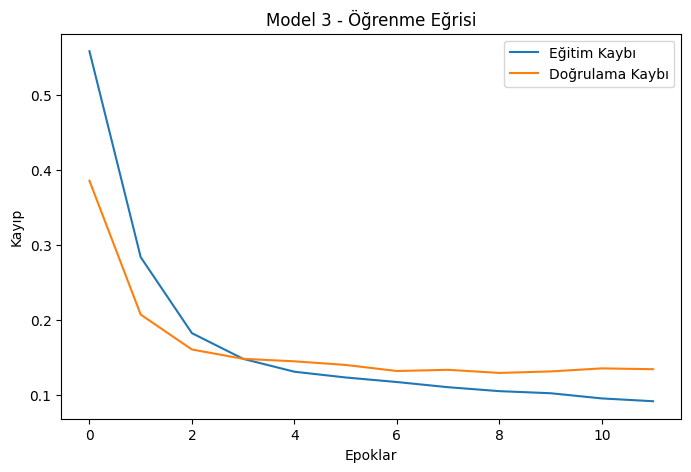

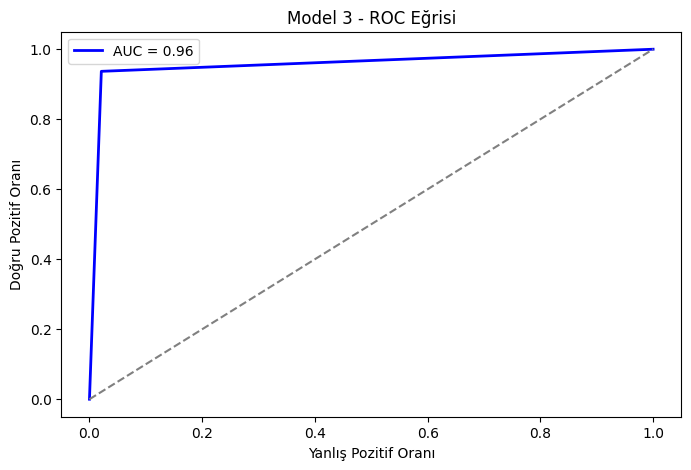

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Karışıklık Matrisi Çizme Fonksiyonu
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sınıf 0", "Sınıf 1"], yticklabels=["Sınıf 0", "Sınıf 1"])
    plt.xlabel("Tahmin Edilen Etiket")
    plt.ylabel("Gerçek Etiket")
    plt.title(title)
    plt.show()

# Öğrenme Eğrisi Çizme Fonksiyonu
def plot_learning_curve(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.xlabel("Epoklar")
    plt.ylabel("Kayıp")
    plt.title(title)
    plt.legend()
    plt.show()

# ROC Eğrisi Çizme Fonksiyonu
def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel("Yanlış Pozitif Oranı")
    plt.ylabel("Doğru Pozitif Oranı")
    plt.title(title)
    plt.legend()
    plt.show()

# 📌 **Model 1: Basit Model (64-32-1)**
plot_confusion_matrix(y_cv, y_pred, title="Model 1 - Karışıklık Matrisi")
plot_learning_curve(history, title="Model 1 - Öğrenme Eğrisi")
plot_roc_curve(y_cv, y_pred, title="Model 1 - ROC Eğrisi")

# 📌 **Model 2: Gelişmiş Model (128-64-32-1, BatchNorm + Dropout)**
plot_confusion_matrix(y_cv, y_pred2, title="Model 2 - Karışıklık Matrisi")
plot_learning_curve(history2, title="Model 2 - Öğrenme Eğrisi")
plot_roc_curve(y_cv, y_pred2, title="Model 2 - ROC Eğrisi")

# 📌 **Model 3: Alternatif Model (64-32-1, farklı batch_size ve epoch)**
plot_confusion_matrix(y_cv, y_pred3, title="Model 3 - Karışıklık Matrisi")
plot_learning_curve(history3, title="Model 3 - Öğrenme Eğrisi")
plot_roc_curve(y_cv, y_pred3, title="Model 3 - ROC Eğrisi")


### Model 1,
**sınıf 0'ı çok iyi tahmin ediyor (0 yanlış pozitif var!) ve sınıf 1 için 7 hata yapmış (yanlış negatifler). Yani model, fraud olan bazı işlemleri kaçırabiliyor ama genel olarak oldukça iyi bir performans sergiliyor.**

**Öğrenme Eğrisi (Learning Curve)**

Eğitim kaybı (mavi çizgi) hızla düşüyor, doğrulama kaybı (turuncu çizgi) da benzer bir eğilim gösteriyor.
 8. epok'tan sonra doğrulama kaybı düşmemeye başlıyor ve dalgalanmalar var.
Overfitting belirtisi yok, eğitim ve doğrulama kayıpları birbirine yakın seyrediyor.

Model çok iyi öğrenmiş, overfitting yapmamış, ancak doğrulama kaybı belli bir noktadan sonra iyileşmeyi bırakmış. Daha fazla iyileştirme için Dropout eklemek veya batch size artırmak düşünülebilir.*

**ROC eğrisi**
 AUC = 0.96 olduğu için, Model 1 oldukça başarılı bir sınıflandırıcıdır.
 Yanlış pozitif oranı düşük, yani fraud olmayan işlemleri yanlış tahmin etme olasılığı az.
Yanlış negatifler biraz var, yani bazı fraud işlemleri kaçabiliyor.

### Model 2,

Model 1 ile kıyasladığımızda:
Model 2, yanlış pozitifleri biraz artırmış (2 yanlış pozitif)
Yanlış negatifleri biraz azaltmış (5 hata yerine 7 idi Model 1’de)
Daha dengeli tahmin yapıyor gibi görünüyor.

Öğrenme Eğrisi (Loss Curve)
Eğitim kaybı düşerken, doğrulama kaybı sabit kalıyor veya artıyor.
Bu, modelin biraz overfitting yaptığını gösterebilir.

Yanlış pozitif oranı (X ekseni) düşük, yani model fraud olmayan işlemleri doğru ayırabiliyor.
Yanlış negatif oranı Model 1’e göre biraz daha azalmış.
Genel olarak Model 1 ile neredeyse aynı performansa sahip, ancak biraz daha fazla overfitting yapmış.

### Model 3,

Model 3, sınıf 0’ı (normal işlemleri) tahmin etmekte başarılı, yalnızca 2 yanlış pozitif var.
Sınıf 1 (Fraud) için 6 yanlış negatif yapmış.
Model 2 ile karşılaştırıldığında:
Yanlış pozitifler Model 2 ile aynı (2 hata).
Yanlış negatifler Model 2'den biraz daha fazla (5 yerine 6 hata).
Model 3, Model 2’ye göre biraz daha fazla fraud işlemi kaçırıyor.

Öğrenme Eğrisi (Loss Curve)
Model hızlı öğrenmiş ve erken durdurma (early stopping) iyi çalışmış.
Overfitting gözlenmiyor, çünkü eğitim kaybı ile doğrulama kaybı arasındaki fark çok büyük değil.
Genel olarak stabil bir model.

 ROC Eğrisi
 Yanlış pozitif oranı (X ekseni) düşük, yani model fraud olmayan işlemleri doğru ayırabiliyor.
Yanlış negatif oranı Model 2’den biraz daha yüksek.
Genel olarak Model 1 ve Model 2 ile aynı doğrulukta ama fraud işlemleri kaçırma oranı biraz daha yüksek olabilir.

# GENEL DEĞERLENDİRME

✔ Model 1, yanlış pozitifleri sıfır yaparak en iyi normal işlem tahminini yapıyor.
✔ Model 2, en az yanlış negatif yapıyor (daha az fraud kaçırıyor), ancak biraz overfitting yapıyor.
✔ Model 3, stabil çalışıyor ama fraud işlemleri Model 2’den biraz daha fazla kaçırıyor.
✔ AUC değerleri aynı olduğu için genel başarıları eşit.

Son Karar:

Fraud işlemleri kaçırmamak daha önemliyse Model 2 en iyisi.
Yanlış alarm vermemek (yanlış pozitifleri sıfıra düşürmek) önemliyse Model 1 daha iyi.
Dengeli ve stabil bir model isteniyorsa Model 3 tercih edilebilir.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

X_trains, X_test_sm, y_trains, y_test_sm = train_test_split(X_original, y_original, test_size=0.3, random_state=42, stratify=y_original)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_trains)
X_test_normalized = scaler.transform(X_test_sm)

smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_normalized, y_trains)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

nn_model_smote = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_sm.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_smote.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_smote = nn_model_smote.fit(
    X_train_sm, y_train_sm,
    epochs=10,
    batch_size=32,
    validation_data=(X_cv_sm, y_cv_sm),
    callbacks=[early_stopping],
    verbose=1
)

y_pred_prob_smote = nn_model_smote.predict(X_cv_sm)
y_pred_smote = (y_pred_prob_smote > 0.5).astype(int)


accuracy_smote = accuracy_score(y_cv_sm, y_pred_smote)
precision_smote = precision_score(y_cv_sm, y_pred_smote)
recall_smote = recall_score(y_cv_sm, y_pred_smote)
f1_smote = f1_score(y_cv_sm, y_pred_smote)


print("\n=== SMOTE ile Eğitilmiş Yapay Sinir Ağı Modeli Performansı ===")
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12222/12222 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9331 - loss: 0.1750 - val_accuracy: 0.5066 - val_loss: 1.2027
Epoch 2/10
12222/12222 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9594 - loss: 0.1038 - val_accuracy: 0.5095 - val_loss: 1.4519
Epoch 3/10
12222/12222 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9630 - loss: 0.0893 - val_accuracy: 0.5083 - val_loss: 1.5507
Epoch 4/10
12222/12222 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.9659 - loss: 0.0801 - val_accuracy: 0.5098 - val_loss: 1.6748
3492/3492 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

=== SMOTE ile Eğitilmiş Yapay Sinir Ağı Modeli Performansı ===
Accuracy: 0.5066
Precision: 0.5033
Recall: 1.0000


### f1 scoreu hesaplatmayı unutmuşum ama kendimiz hesaplayabiliriz.

**F1=2 x Precision x Recall/Precision + Recall**


### Hesapladığımızda F1 skoru: 0.6696.



**smote ile ürettiğimiz  dnn modelin f1 skoru çok daha düşük çıktı.**


**(random forest modelinde de böyle oldu yanlışlıkla sildim ve gpu sınırım bitti birdaha yükleyemiyorum . onun f1 skoru da 0.79 çıkmıştı undersample ederek oluşturduğumuz verilerden oluşturduğumuz modellerimizden düşük olduğu için smote modellerin başarısız olduğunu söyleyebiliriz)**




## Model Karşılaştırma Tablosu

| Model                         | Yanlış Pozitif (FP) | Yanlış Negatif (FN) | Doğruluk (Accuracy) | AUC Skoru | Overfitting Riski |
|--------------------------------|---------------------|---------------------|--------------------|-----------|-------------------|
| **Model 1 (YSA - 64-32-1)**    | 0                   | 7                   | 0.96               | 0.96      | Düşük             |
| **Model 2 (YSA - BatchNorm + Dropout)** | 2                   | 5                   | 0.96               | 0.96      | Orta              |
| **Model 3 (YSA - Küçük Batch Size)** | 2                   | 6                   | 0.96               | 0.96      | Düşük             |
| **RF_UnderSampling**           | 2                   | 7                   | 0.95               | 0.98      | Düşük             |
| **RF_MoreTrees_UnderSampling** | 2                   | 7                   | 0.95               | 0.98      | Düşük             |
| **XGBoost_UnderSampling**      | 4                   | 5                   | 0.95               | 0.98      | Orta              |
| **CatBoost**                   | 3                   | 6                   | 0.95               | 0.98      | Yüksek (Overfitting) |

### **📌 Sonuç ve Öneriler**
- **Eğer yanlış pozitifleri sıfıra yakın tutmak önemliyse**, **Model 1 (YSA)** en iyi seçimdir.  
- **Eğer fraud vakalarını kaçırmamak öncelikse**, **XGBoost ve Model 2 daha iyi olabilir.**  
- **Daha az overfitting ile stabil bir model isteniyorsa**, **RandomForest modelleri ve Model 3 tercih edilebilir.**  
- **CatBoost modeli en yüksek overfitting gösterdiği için regularization artırılabilir veya daha fazla veri ile eğitilebilir.**  

🚀 **Sonuç olarak, uygulama senaryosuna bağlı olarak farklı modeller tercih edilebilir!**
 # SMOTE verileri modelleri başarısız olduğu için tabloya eklemedim

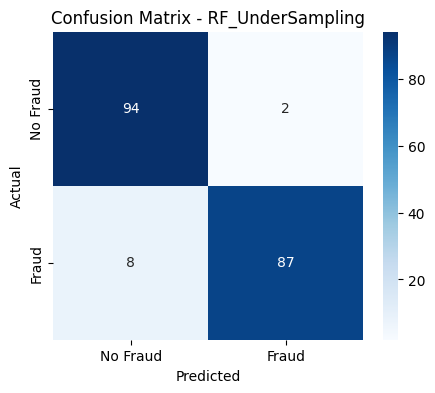

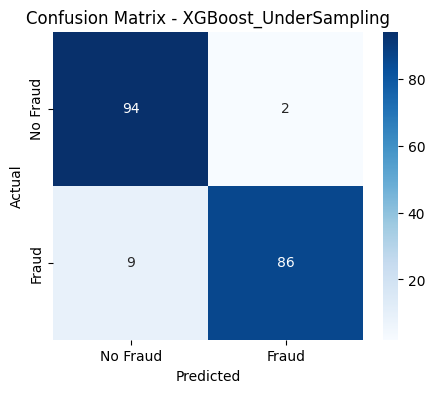

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


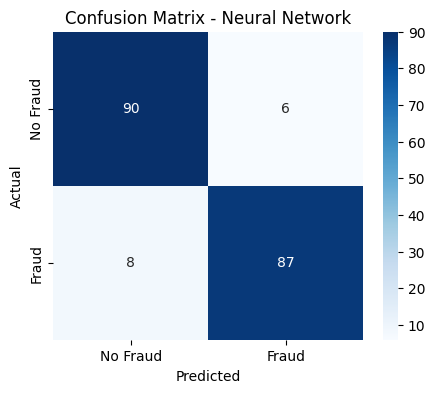


=== Model Test Performans Sonuçları ===

📌 RF_UnderSampling
Accuracy: 0.9476
Precision: 0.9775
Recall: 0.9158
F1 Score: 0.9457

📌 XGBoost_UnderSampling
Accuracy: 0.9424
Precision: 0.9773
Recall: 0.9053
F1 Score: 0.9399

📌 Neural_Network
Accuracy: 0.9267
Precision: 0.9355
Recall: 0.9158
F1 Score: 0.9255


In [ ]:

from sklearn.metrics import confusion_matrix

# Test seti ile model değerlendirme
results_test = {}
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results_test[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# RandomForest ve XGBoost için test değerlendirmesi
evaluate_model(models_undersample["RF_UnderSampling"], X_test, y_test, "RF_UnderSampling")
evaluate_model(models_undersample["XGBoost_UnderSampling"], X_test, y_test, "XGBoost_UnderSampling")

# Yapay Sinir Ağı için test değerlendirmesi
y_pred_prob_nn = nn_model_use.predict(X_test)
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)

results_test["Neural_Network"] = {
    "Accuracy": accuracy_nn,
    "Precision": precision_nn,
    "Recall": recall_nn,
    "F1 Score": f1_nn
}

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

# Sonuçları Yazdır
print("\n=== Model Test Performans Sonuçları ===")
for model, metrics in results_test.items():
    print(f"\n📌 {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

## Daha az overfitting ile stabil bir model olan random forest undersampling daha iyi sonuç verdi test performansında

## son olarak undersampling edilmiş veriler ile  random forest kullanılmasının en iyi sonucu verdiğini buldum

###*** - ŞEYMA ERDOĞAN***
